# **Introduction**

The goal of this research is to predict how long players will spend playing Minecraft variously due to their skill level, gender, age and subscription status. Knowing play time can help developers target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract. We can investigate the correlation between a player's age, gender, subscription status and the amount of time they spend playing the game by forecasting their play hours. 


This data is collected by a research group in Computer Science at UBC, on how people play video games.
Analyzing data on how people play the game helps improve the gaming experience, and increase player engagement, and stable servers. Especially, the Minecraft server we are analyzing is a small server, prediction of the play hours would give insight to developers on how to prevent server overload and improve operation. 
# **The primary question addressed in this project is:**
### **What factors impact the amount of times users play Minecraft?** 
Specifically, we aimed to predict users' play hours depending on different variables. The dataset “players” collected by the UBC research team represents how players play Minecraft. The data set is based on the Minecraft server, and players' actions are recorded as they navigate through the world.
It consists of **197 observations** with **six primary variables**: experience, subscription status, play hours, name, gender, and age.
- The **experience** variable is categorical data indicating players’ experience level(e.g., beginner, amateur, pro and veteran).
The player assigns themselves to this category based on their level of game familiarity. This examines varying game comprehension levels on player involvement. 
- The **subscribe** variable is boolean data indicating whether players subscribed to the game. Depending on their subscription status, the values can be either True or False. 
- **Played hours** variable is numeric data representing the total spent hours a game player has played. 
- The **name** is a string of data that represents the name of the player uniquely given to players in the game. 
- The **gender** variable is categorical data which indicates the gender of players. There are seven different genders in this study, total:  male, female, non-binary, prefer not-to-say, two-spirited, agender, and others. This information gives insight into the correlation of playtime between different genders. 
- The **age** variable is integer data indicating the age of players’. It is used to determine how it affects the user's engagement depending on their age.


Certain variables, such as **Individual ID**, **hashed email**, and **organization name**, are excluded from the analysis since they are irrelevant. For example, the individual ID and organization name variables are left blank, and the hashed email does not provide any meaningful data in this study. 

# **Methods and Results**

In [2]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(repr)
  library(tidymodels)
})
options(repr.matrix.max.rows = 6)
set.seed(100)

We first load the data into our notebook

In [3]:
players = read_csv("ProjectData/players.csv", show_col_types = FALSE)
players

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Next we wrangle the data so that we only have the variables we need and convert all categorical variables to be numerical. Categorical variables will be a little complicated here as we have multiple categories a player can fall into. To solve this, we will split each categorical into a false/true variable for that category. We can then assign 0/1 values to true/false values respectively.

In [4]:
players_clean <- players |>
    select(experience, subscribe, gender, age, played_hours) |>
    mutate(
        # Convert `experience` to boolean columns for each category
        Pro_experience = as.numeric(experience == "Pro"),
        Veteran_experience = as.numeric(experience == "Veteran"),
        Amateur_experience = as.numeric(experience == "Amateur"),
        Regular_experience = as.numeric(experience == "Regular"),
        Beginner_experience = as.numeric(experience == "Beginner"),
        
        # Convert `gender` to boolean columns for each category
        Male_gender = as.numeric(gender == "Male"),
        Female_gender = as.numeric(gender == "Female"),
        Non_binary_gender = as.numeric(gender == "Non-binary"),
        Agender_gender = as.numeric(gender == "Agender"),
        Two_Spirited_gender = as.numeric(gender == "Two-Spirited"),
        Prefer_not_to_say_gender = as.numeric(gender == "Prefer not to say"),
        Other_gender = as.numeric(gender == "Other"),

        # Convert the subscribe boolean
        subscribe = as.numeric(subscribe)
    ) |>
    select(-experience, - gender)

players_clean

subscribe,age,played_hours,Pro_experience,Veteran_experience,Amateur_experience,Regular_experience,Beginner_experience,Male_gender,Female_gender,Non_binary_gender,Agender_gender,Two_Spirited_gender,Prefer_not_to_say_gender,Other_gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,30.3,1,0,0,0,0,1,0,0,0,0,0,0
1,17,3.8,0,1,0,0,0,1,0,0,0,0,0,0
0,17,0.0,0,1,0,0,0,1,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,17,0.0,0,0,1,0,0,0,0,0,0,0,1,0
0,17,2.3,0,0,1,0,0,1,0,0,0,0,0,0
1,91,0.2,1,0,0,0,0,0,0,0,0,0,0,1


Here we have wrangled the data in a form that is ready for linear regression. We have variables that indicate categories and ones and zeros that represent true and false, respectively. After stepping and scaling done by our recipe, our data will be completely clean and ready for regression.

We will now provide visualizations to illustrate the distribution of the data for each categorical variable, which is crucial for understanding the composition of our dataset. In Figure 1, we observe that the majority of players fall under the "Amateur" experience category, highlighting that this group dominates the player base. Figure 2 reveals that the majority of players are male, suggesting a possible gender imbalance in the dataset. While these distributions do not directly indicate whether these groups contribute significantly to the number of hours played, they provide valuable context for our analysis by highlighting which groups are most represented in the dataset. These visualizations help us identify potential patterns or biases in the data that may influence the model's predictions.

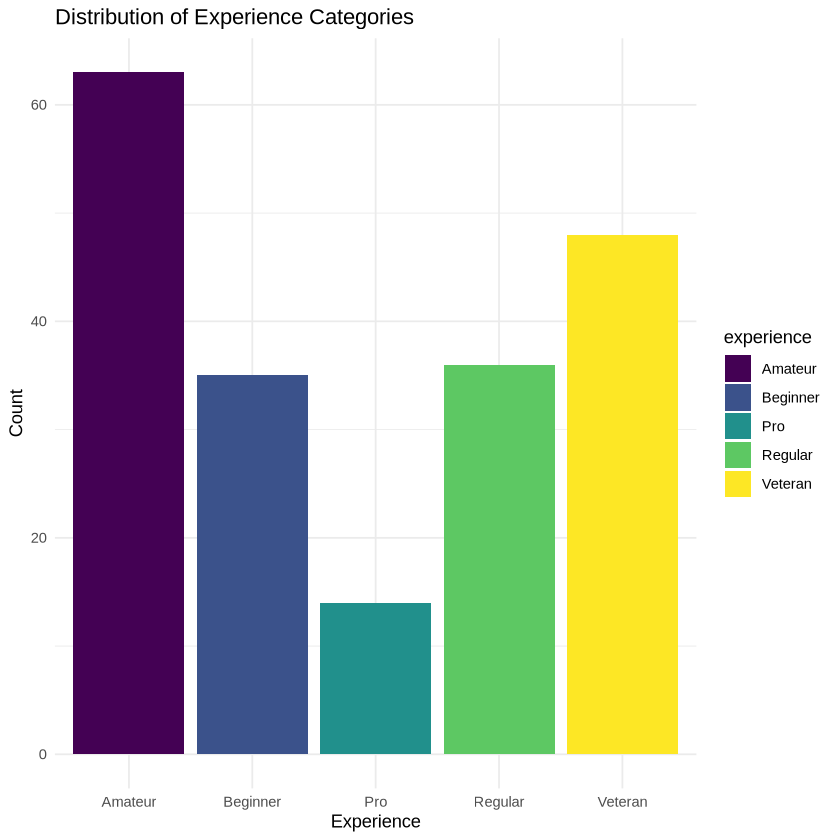

In [5]:
ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(title = "Distribution of Experience Categories", x = "Experience", y = "Count") +
  theme_minimal() +
  scale_fill_viridis_d()

Figure 1. Distribution of experience categories

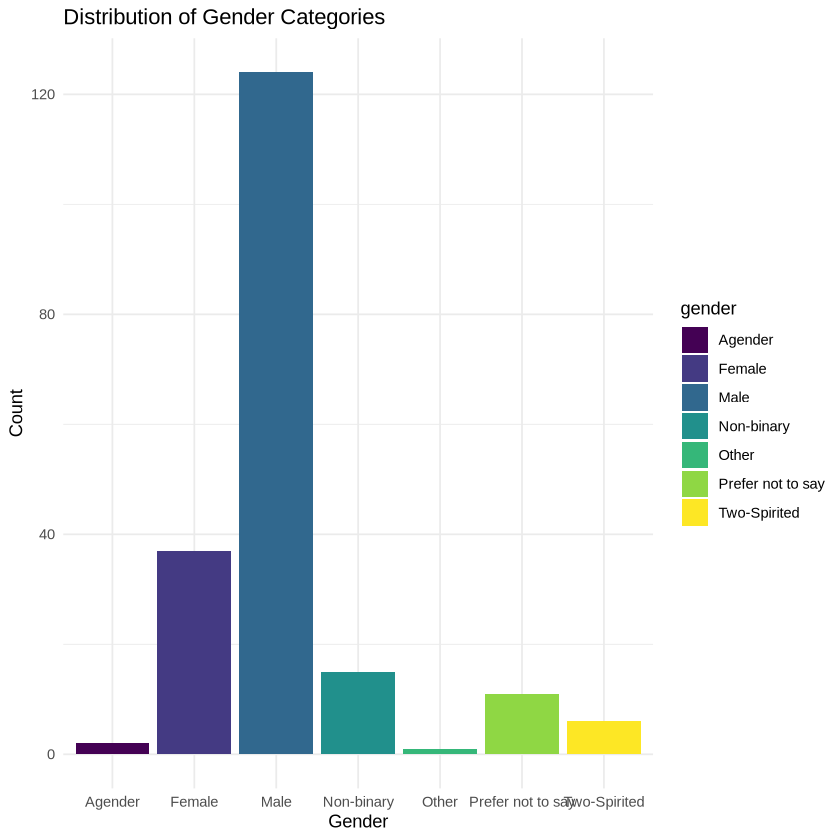

In [6]:
ggplot(players, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Distribution of Gender Categories", x = "Gender", y = "Count") +
  theme_minimal() +
  scale_fill_viridis_d()

Figure 2. Distribution of gender categories

We will now conduct our regression analysis. We first set a seed for reproducable results. We then split our data into a standard 75/25 training/testing split. We define a recipe that predicts played hours from all other variables and steps/scales the data so that it is ready for regression. We define our linear regression model, and create a workflow to fit our model to our training data. We then bind our predictions back onto the dataset and use that to calculate metrics such as RMSPE.

In [28]:
set.seed(100)
split = initial_split(players_clean, 0.75, strata = played_hours)
testing = testing(split)
training = training(split)

player_recipe = recipe(played_hours ~. , data = training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

lm_spec = linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

player_fit = workflow() |>
    add_model(lm_spec) |>
    add_recipe(player_recipe) |>
    fit(data = training)


player_preds <- player_fit |>
  predict(testing) |>
  bind_cols(testing)

player_metrics = player_preds |> metrics(truth = played_hours, estimate = .pred)

rmspe = player_metrics |>
    filter(.metric == "rmse") |>
    pull(.estimate)

Warning message:
“!  The following column has zero variance so scaling cannot be used:
  Other_gender.
ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
  before normalizing.”
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


We find the RMPSE of our model to be 39.9

We will now visualize the coefficients of our regression model to identify which categories of players contribute the most to playtime. These visualizations allow us to interpret the impact of each variable on the response variable, hours played. A high and positive coefficient indicates that the corresponding variable significantly contributes to increased playtime, while a high and negative coefficient suggests that the variable is associated with reduced playtime. In contrast, variables with coefficients close to zero have minimal influence. These visualizations provide valuable insights into how different categories, such as experience level and gender, affect playtime and help validate the relevance of our model's predictors.

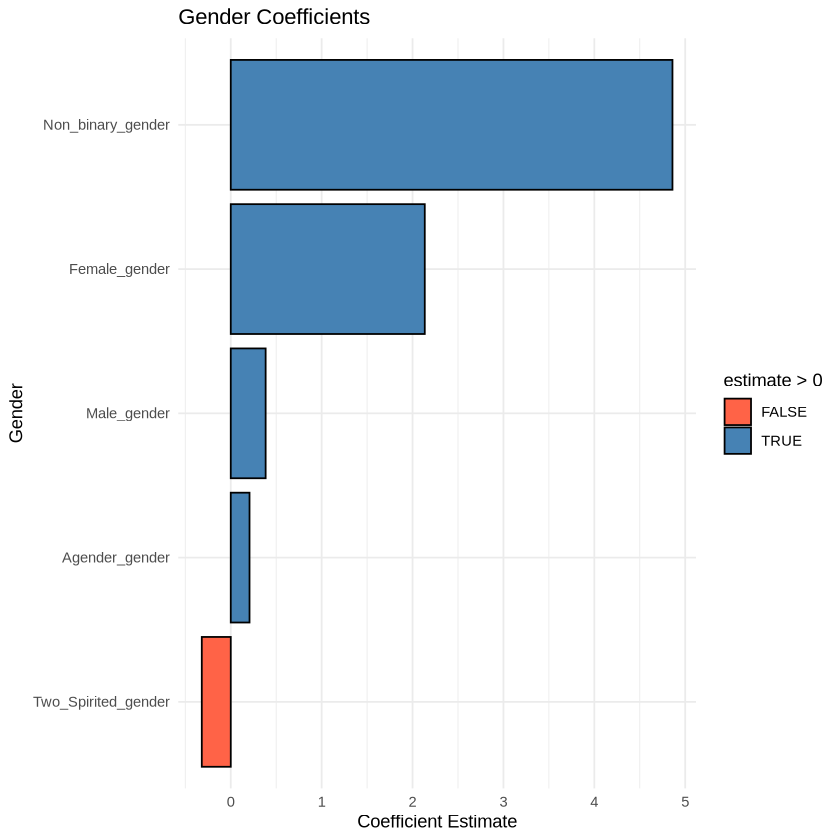

In [32]:
coefficients <- tidy(player_fit$fit$fit)

gender_coefficients <- coefficients |>
  filter(str_detect(term, "gender")) |>
  filter(term != "(Intercept)") |>
  drop_na(estimate)

experience_coefficients <- coefficients |>
  filter(str_detect(term, "experience")) |>
  filter(term != "(Intercept)") |>
  drop_na(estimate)

gender_plot <- ggplot(gender_coefficients, aes(x = reorder(term, estimate), y = estimate, fill = estimate > 0)) +
  geom_bar(stat = "identity", color = "black") +
  coord_flip() +
  labs(
    title = "Gender Coefficients",
    x = "Gender",
    y = "Coefficient Estimate"
  ) +
  scale_fill_manual(values = c("TRUE" = "steelblue", "FALSE" = "tomato")) +
  theme_minimal()

experience_plot <- ggplot(experience_coefficients, aes(x = reorder(term, estimate), y = estimate, fill = estimate > 0)) +
  geom_bar(stat = "identity", color = "black") +
  coord_flip() +
  labs(
    title = "Experience Coefficients",
    x = "Experience",
    y = "Coefficient Estimate"
  ) +
  scale_fill_manual(values = c("TRUE" = "steelblue", "FALSE" = "tomato")) +
  theme_minimal()

gender_plot

Figure 3. Regression Coefficients on Gender Categories

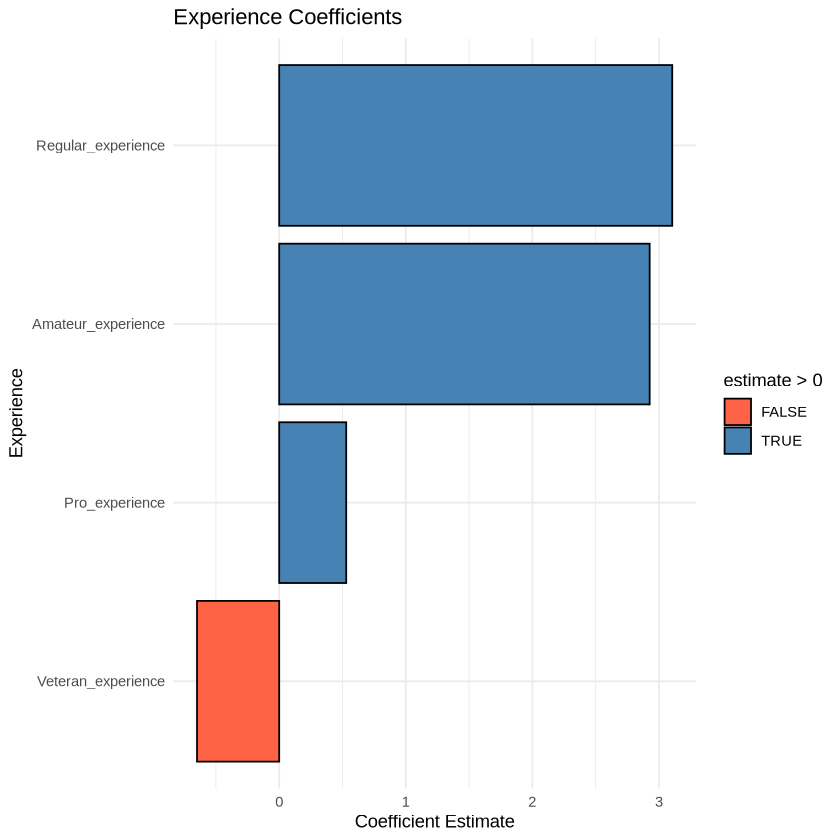

In [33]:
experience_plot

Figure 4. Regression Coefficients on Experience Categories

The visualizations of the regression coefficients provide an overview of the relationships between the categorical variables and the response variable, hours played. In Figure 1, the Non_binary_gender category has the largest positive coefficient, followed by Female_gender, while Two_Spirited_gender is the only category with a negative coefficient. Smaller positive coefficients are observed for Male_gender and Agender_gender. In Figure 2, the Regular_experience category shows the highest positive coefficient, followed by Amateur_experience and Pro_experience, which also exhibit positive relationships. The Veteran_experience category has a negative coefficient. These observations provide a detailed view of how each category is associated with the response variable, setting the stage for further interpretation in the discussion section

# **Discussion**
The question we have discussed as a group is: **What kinds of players will contribute the most to the data using playtime as our response variable?**

---

## **Findings**

For our **gender categories**, players who identify as **Non-Binary** have the largest positive coefficient, meaning that Non-Binary players are the largest contributors to our response variable (*playtime*) and should be considered highly valuable to the dataset. Additionally, players who identify as **Female** show a strong contribution as well, second only to Non-Binary players. Players who identify as **Male** or **Agender** contribute positively but to a lesser degree than Non-Binary and Female players. The only gender category with a negative coefficient was **Two-Spirited**, indicating reduced engagement or contribution.

For our **experience categories**, we have discovered that players with **Regular Experience** show the largest positive contribution to our response variable. They are key to player engagement and should be considered the most valuable group in terms of data contribution for our experience category. Players with **Amateur** and **Pro Experience** also contribute positively, but to a lesser degree than Regular Experience players. Amateur and Pro Experience players still play a significant role in engagement. **Veteran Players** have a negative coefficient, meaning these players are associated with lower levels of engagement.

---

## **Was This Expected?**

The results that we obtained were **not expected**. This is due to our initial observations of the distribution of our predictor variables.

For our **experience categories**, we observed that most players identified themselves as having **Amateur Experience**, with **Veteran Players** being the second largest group. Given this observation, it seemed reasonable to expect that players who are Veteran or Amateur would contribute the most to our response variable. Instead, players with **Regular Experience**, which is a smaller category, were the most impactful.

For our **gender categories**, we observed that players who identify as **Male** were the largest contributors to our initial dataset. Based on this, we expected Male players to contribute the most to playtime. However, it turned out that **Non-Binary** players contributed the most to playtime despite their smaller size in the dataset. Male players came in third in terms of impact for playtime, which was unexpected given their larger representation. We were less surprised by the contribution of **Female** players since they were the second-largest group in the gender categories and contributed the second most to playtime.

---

## **Impact of Findings**

Our regression results show that **initial representation does not necessarily predict impact**; instead, groups that are more engaged (e.g., **Non-Binary** and **Regular Experience**) can drive greater contributions.

By targeting groups like those with **Regular Experience** and **Non-Binary** players, engagement can be enhanced further. Addressing the negative contributions of groups like **Veteran Players** and **Two-Spirited Players** could help balance the data and improve engagement overall.

Smaller, underrepresented groups like **Non-Binary** and **Two-Spirited** players provide insights into how inclusivity affects engagement. There is work to be done to further maintain and enhance their participation.

Additionally, we can develop practices to help target these players for our data. For example:
- By focusing on players who are **Non-Binary**, we could recruit more players in these demographics, potentially increasing engagement and playtime.
- Developing strategies to engage with more underrepresented groups could bring more diversity to the dataset.
- Developers of **Plaicraft** could also create in-game content catered toward underrepresented or major demographics to sustain engagement.

---

## **Further Questions**

- **Why did Veteran Players shift from being a large initial group to a negative contributor in our regression analysis?** Does this have something to do with the data or with the psychology of Veteran players? What can Plaicraft do to re-engage with them?

- **What barriers lead to negative contributions from Two-Spirited players?** Are these related to the game itself, social dynamics, or other factors?

- **What can be learned from Non-Binary and Regular Experience players?** How can insights from their contributions be leveraged

- **What specific features of Plaicraft drive engagement of subscribed players?** Is it because the game is Minecraft, or is there another influence driving engagement?

- **What are players doing a majority of the time? Are they building, exploring, or pursuing combat?** Within the majority demographic, what specific activities dominate their playtime?

- **How can Minecraft enhance inclusivity for Non-Binary players through in-game representation?**

- **How can Minecraft enhance inclusivity for Non-Binary players through in-game representation?**
What role does a player's gender play in influencing preferred game modes or features?

- **What could Plaicraft do to increase the retention of Non-Binary and Regular Experience players in the long term?**
